<a href="https://colab.research.google.com/github/garfield-gray/DIP/blob/main/dipHW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#4/14/2023, Let's begin
import numpy as np
import matplotlib.pyplot as plt

#First Problem

In [2]:
# first off we upload the image
im = plt.imread("1.png", ".png")

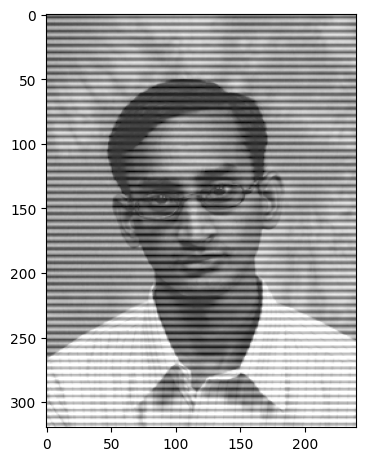

In [3]:
plt.figure(figsize = (4,7))
plt.imshow(im, cmap="gray")
plt.show()



In [4]:
im.shape

(320, 240)

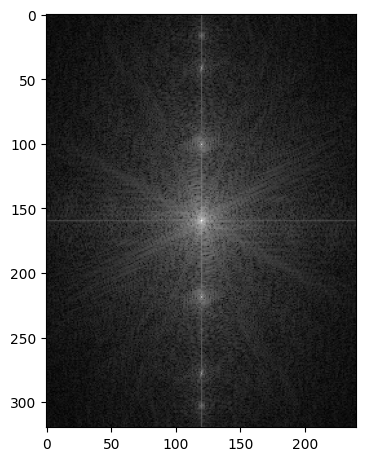

In [6]:
# transformaton to signal domain through fft
imf = np.fft.fftshift(np.fft.fft2(im))
plt.figure(figsize = (4,7))
plt.imshow(np.log(np.ones(imf.shape)+abs(imf)), cmap="gray")
plt.show()

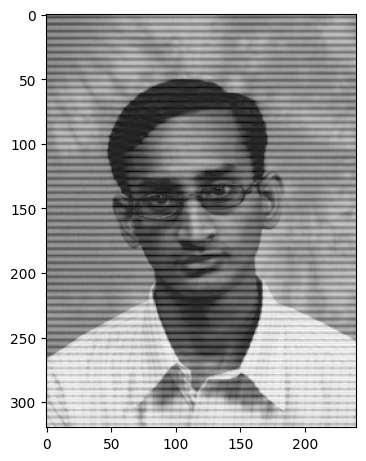

In [40]:
# transformaton to signal domain through fft
mask = np.ones_like(imf)
rows, cols = im.shape
y, x = np.indices((rows, cols))
mask[80:102, 100:140] = 0

# Apply the mask to the FFT
imff = imf * mask

fiimf = np.fft.ifft2(np.fft.ifftshift(imff)).real

plt.figure(figsize = (4,7))
plt.imshow(fiimf, cmap="gray")
plt.show()


In [ ]:
im[100:110,200:202].real/np.max(im[100:110,200:202].real)

array([[0.465, 0.46 ],
       [0.545, 0.55 ],
       [0.855, 0.855],
       [1.   , 0.99 ],
       [0.875, 0.87 ],
       [0.57 , 0.565],
       [0.43 , 0.435],
       [0.73 , 0.725],
       [0.96 , 0.97 ],
       [0.955, 0.97 ]], dtype=float32)

In [ ]:
(imf.real/np.max(imf.real)).shape

(320, 240)

In [ ]:
imf.shape

(320, 240)

In [ ]:
im.shape

(320, 240)

In [7]:
im1 = plt.imread("2.png", ".png")[:,:,0]

In [ ]:
im1.shape

(476, 630)

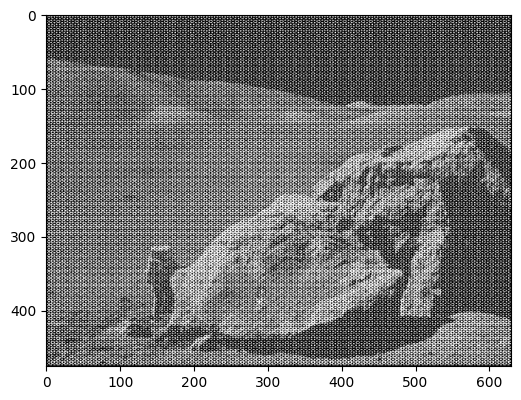

In [8]:
plt.figure(figsize = (6,10))
plt.imshow(im1, cmap="gray")
plt.show()


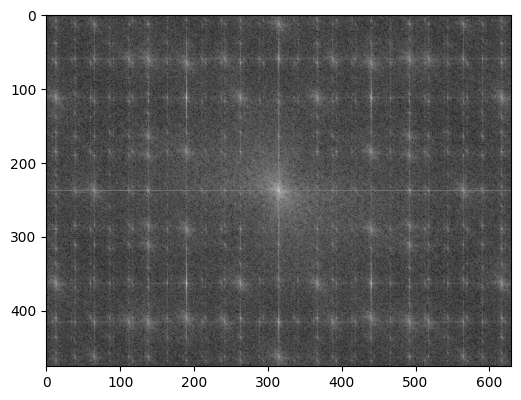

In [9]:
# transformaton to signal domain through fft
imf1 = np.fft.fftshift(np.fft.fft2(im1))
plt.figure(figsize = (6,10))
plt.imshow(np.log(np.ones(imf1.shape)+abs(imf1)), cmap="gray")
plt.show()

In [ ]:
!ls

1.png  2.png  donald.png  sample_data


In [10]:
im2 = plt.imread("donald.png", ".png")[:,:,0]

In [11]:
im2.shape

(291, 328)

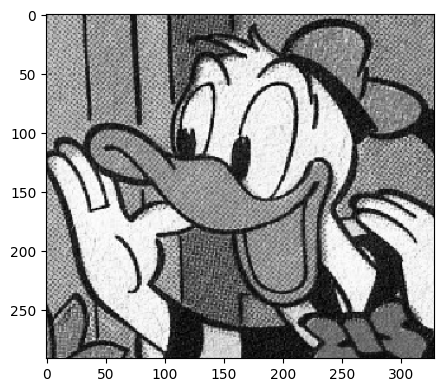

In [12]:
plt.figure(figsize = (5,8))
plt.imshow(im2, cmap="gray")
plt.show()


In [ ]:
np.log(np.e)

1.0

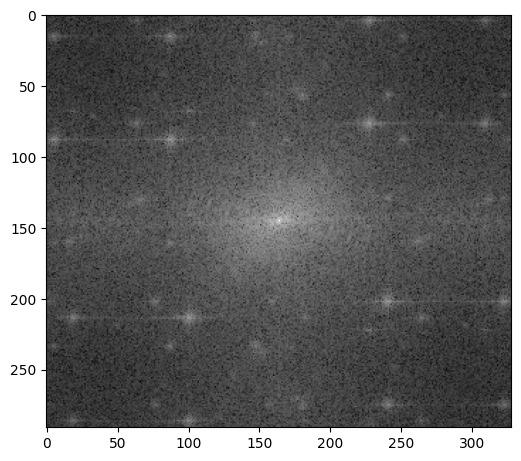

In [14]:
# transformaton to signal domain through fft
imf2 = np.fft.fftshift(np.fft.fft2(im2))
plt.figure(figsize = (6,10))
plt.imshow(np.log(np.ones(imf2.shape)+abs(imf2)), cmap="gray")
plt.show()

In [27]:
y, x = np.indices((im.shape))
print(x)

[[  0   1   2 ... 237 238 239]
 [  0   1   2 ... 237 238 239]
 [  0   1   2 ... 237 238 239]
 ...
 [  0   1   2 ... 237 238 239]
 [  0   1   2 ... 237 238 239]
 [  0   1   2 ... 237 238 239]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the image as a numpy array
img = plt.imread('image.jpg')

# Perform the FFT on the image
fft = np.fft.fft2(img)

# Shift the zero-frequency component to the center of the spectrum
shifted_fft = np.fft.fftshift(fft)

# Visualize the magnitude of the FFT
plt.imshow(np.abs(shifted_fft), cmap='gray')
plt.show()

# Create a mask that zeroes out frequencies corresponding to vertical noise
mask = np.ones_like(shifted_fft)
rows, cols = img.shape
y, x = np.indices((rows, cols))
mask[np.abs(y - rows/2) < rows/8, :] = 0

# Apply the mask to the FFT
filtered_fft = shifted_fft * mask

# Shift the zero-frequency component back to the top-left corner of the spectrum
unshifted_fft = np.fft.ifftshift(filtered_fft)

# Inverse FFT the filtered FFT to obtain the filtered image
filtered_img = np.fft.ifft2(unshifted_fft).real

# Visualize the filtered image
plt.imshow(filtered_img, cmap='gray')
plt.show()


Text(0.5, 1.0, 'Original image')

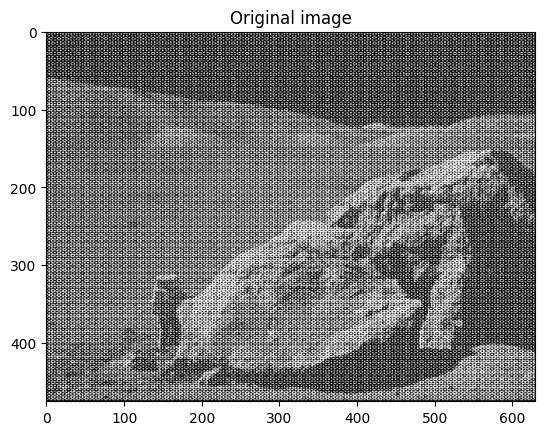

In [41]:

plt.figure()
plt.imshow(im1, plt.cm.gray)
plt.title('Original image')

Text(0.5, 1.0, 'Filtered Spectrum')

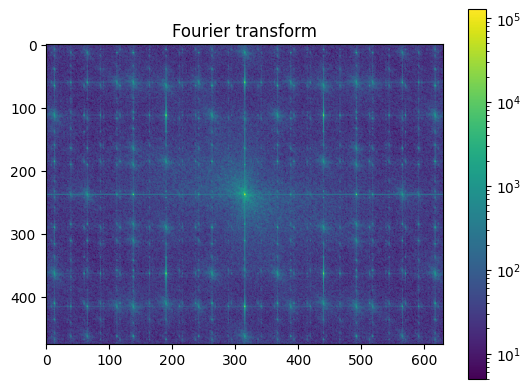

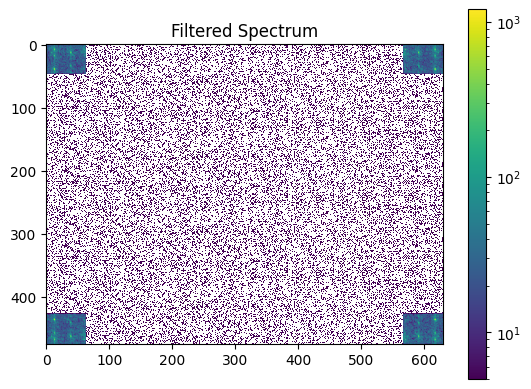

In [44]:
def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure()
plot_spectrum(imf1)
plt.title('Fourier transform')




# In the lines following, we'll make a copy of the original spectrum and
# truncate coefficients.

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.1

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2 = imf1.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')

Text(0.5, 1.0, 'Reconstructed Image')

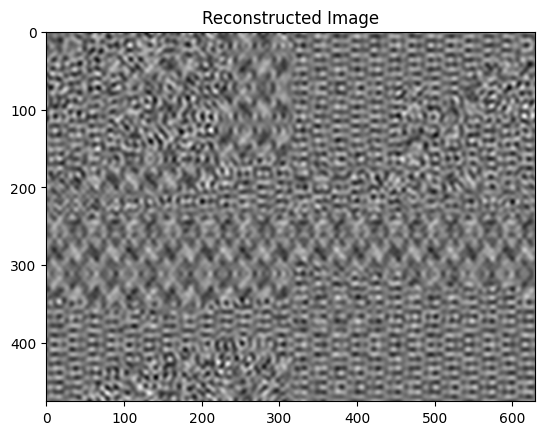

In [48]:
# Reconstruct the denoised image from the filtered spectrum, keep only the
# real part for display.
im_new = np.fft.ifftshift(np.fft.ifft2((im_fft2))).real


plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')


Text(0.5, 1.0, 'Original image')

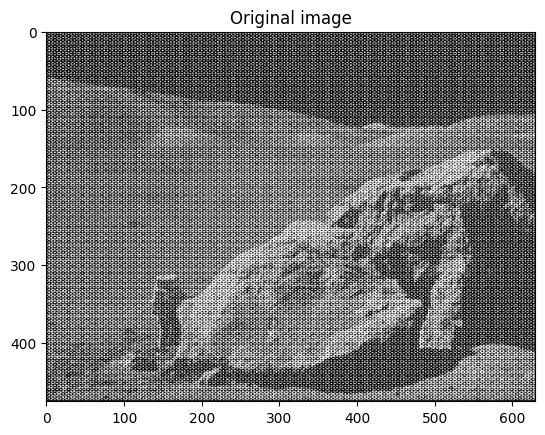

In [49]:
im = plt.imread('2.png').astype(float)

plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original image')

In [51]:
# In the lines following, we'll make a copy of the original spectrum and
# truncate coefficients.

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.1

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2 = im_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')

ValueError: ignored

Text(0.5, 1.0, 'Reconstructed Image')

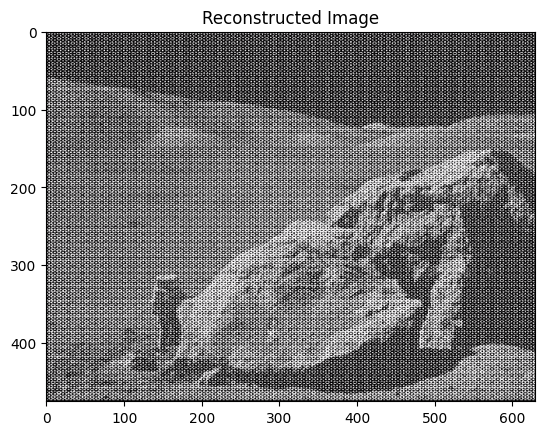

In [52]:
# Reconstruct the denoised image from the filtered spectrum, keep only the
# real part for display.
im_new = fftpack.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')

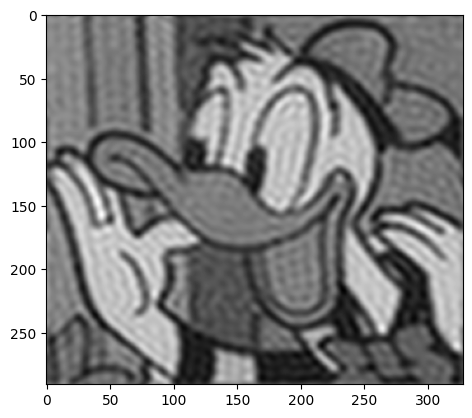

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Load the image
img = plt.imread('donald.png')

# Convert to grayscale
gray = np.mean(img, axis=2)

# Apply the FFT
f = np.fft.fft2(gray)

# Shift the FFT
fshift = np.fft.fftshift(f)

# Create a low-pass filter
rows, cols = gray.shape
crow, ccol = int(rows/2), int(cols/2)
lpf = np.zeros((rows, cols), np.uint8)
r = 30
lpf[crow-r:crow+r, ccol-r:ccol+r] = 1

# Apply the filter to the FFT
fshift_filtered = fshift * lpf

# Shift back the result
f_filtered = np.fft.ifftshift(fshift_filtered)

# Apply the inverse FFT
filtered = np.abs(np.fft.ifft2(f_filtered))

# Display the result
plt.imshow(filtered, cmap='gray')
plt.show()


Text(0.5, 1.0, 'Original image')

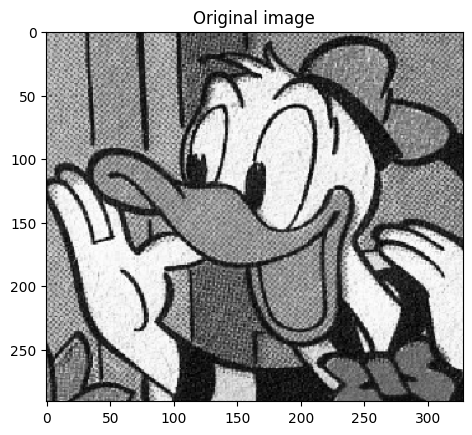

In [55]:

plt.figure()
plt.imshow(gray, plt.cm.gray)
plt.title('Original image')

Text(0.5, 1.0, 'Original image')

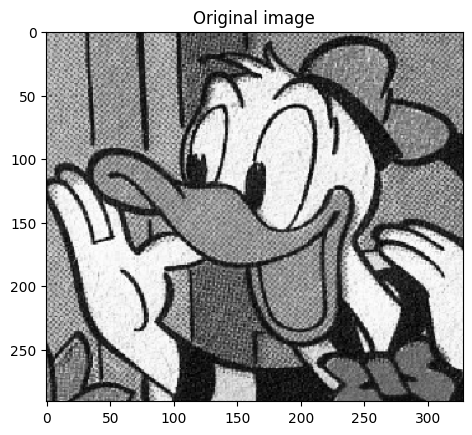

In [56]:

plt.figure()
plt.imshow(im2, plt.cm.gray)
plt.title('Original image')